# Tarea 4 de Matemáticas para la ciencia de la computación
## DataSet trabajado: Pokémon
## Peter Jonathan Montalvo García (20193894)




In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
pokemon = pd.read_csv("pokemon.csv")

In [5]:
#Veamos la forma de la data:
pokemon.shape

(800, 12)

In [6]:
pokemon.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


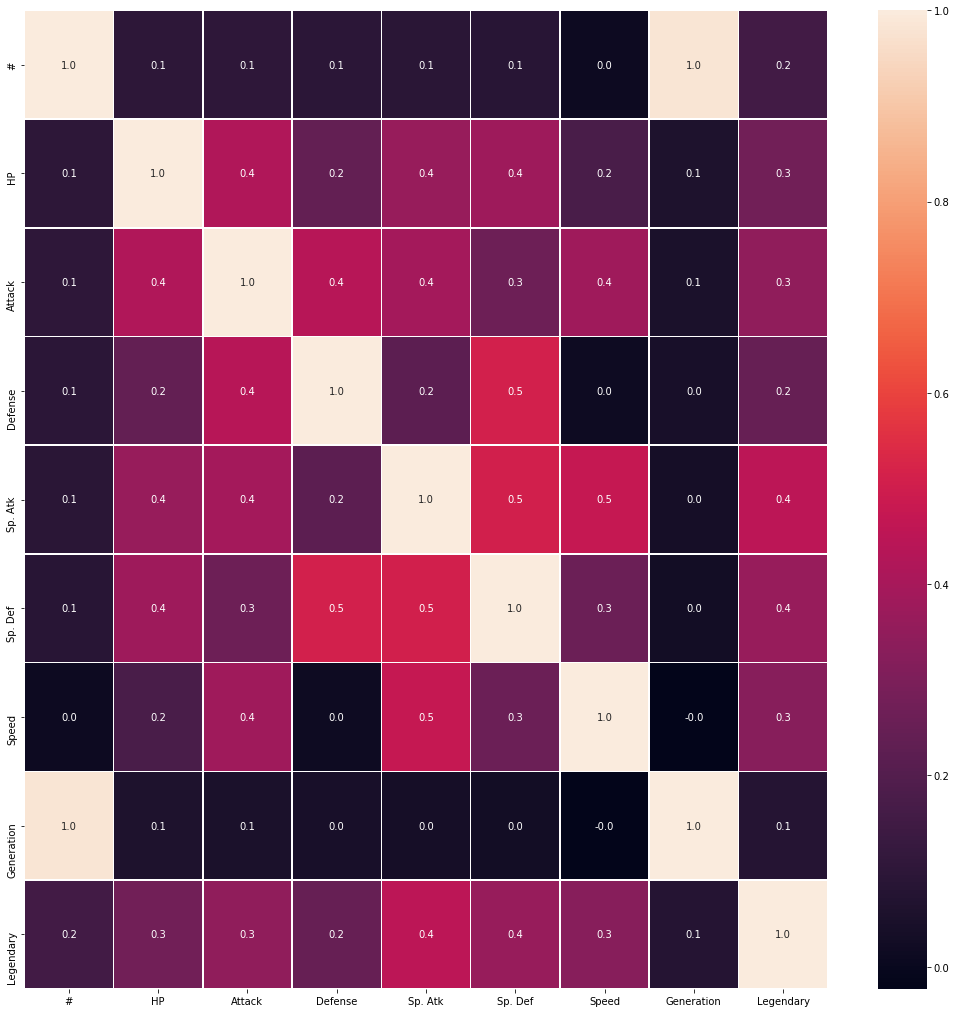

In [7]:
#Mapa de correlación:
fif,axes = plt.subplots(figsize=(18,18))
sns.heatmap(pokemon.corr(), annot=True, linewidths=.5, fmt= '.1f', ax=axes)
plt.show()

In [8]:
#Datos de la cabecera:
pokemon.head(10)


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,6,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False
6,7,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
7,8,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
8,9,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False
9,10,Squirtle,Water,NaN,44,48,65,50,64,43,1,False


<Figure size 720x576 with 0 Axes>

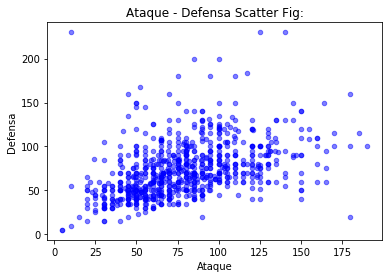

In [9]:
# Para plotear:
# x = Attack(Ataque), y= Defense(Defensa)
plt.figure(figsize=(10,8))
pokemon.plot(kind='scatter', x='Attack', y='Defense', alpha=.5, color='b')

plt.xlabel('Ataque')
plt.ylabel('Defensa')
plt.title('Ataque - Defensa Scatter Fig:')
plt.show()

In [10]:
#Trabajemos con el campo HP:
Salud = pokemon.HP
Salud.shape

(800,)

In [11]:
Salud.describe()

count    800.000000
mean      69.258750
std       25.534669
min        1.000000
25%       50.000000
50%       65.000000
75%       80.000000
max      255.000000
Name: HP, dtype: float64

Factor 1: 800
Factor 2: 55407
Factor 3: 185314.18571415628
Resultado máximo de la función: -5915.046613935905
Estimador de máxima verosimilitud: 69.0


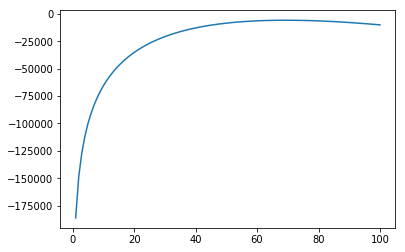

In [12]:
#Se aproxima a una Poisson
#Se halla la funcion de maxima verosimilitud
import math

F1 = Salud.shape[0]
F2 = np.sum(Salud)
F3 = 1
for i in Salud :
  F3 = F3*(np.math.factorial(i))
ln_F3 = math.log(F3)
Y=[]
ymax = -7000
X=np.linspace(1,100, num=100)
for r in X:
  tempy =-F1*r+F2*math.log(r)-ln_F3
  Y.append(tempy)
  if tempy > ymax:
    ymax = tempy
    xmax = r
plt.plot(X,Y)

print('Factor 1:', F1)
print('Factor 2:',F2)
print('Factor 3:',ln_F3)
print('Resultado máximo de la función:',ymax)
print('Estimador de máxima verosimilitud:',xmax)

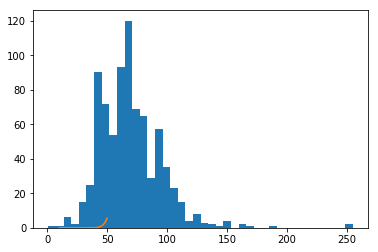

In [13]:
xPoints =np.linspace(10,50,41)
yPoints =[]
for r in xPoints:
  yPoints.append( (math.exp(-69)) * (69**(r))*1800 / (np.math.factorial(r)) )


plt.figure()
plt.hist(Salud, bins='auto')
plt.plot(xPoints,yPoints)

plt.show()